# Método BDq

Método para definir intervenção em uma floresta baseado na busca por uma distribuição diamétrica equilibrada.

In [ ]:
import pandas as pd
import math as m
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
distDiam = pd.read_csv('https://raw.githubusercontent.com/Gorgens/treelab/master/manejo/distribuicaoDiametrica.csv')
# distDiam

,CC,Nha,AB,Vol
0,15,336.36,5.3647,54.2
1,25,125.45,5.8008,64.2
2,35,47.23,4.3616,51.3
3,45,22.68,3.4918,43.0
4,55,13.45,3.0725,39.2
5,65,4.95,1.6039,21.1
6,75,2.77,1.1861,16.0
7,85,2.23,1.2358,17.1
8,95,0.95,0.6642,9.4
9,105,0.32,0.2765,4.0


Etapas para BDq:

1. Definir q alvo
2. Calcular b1
3. Calcula fator para cada classe diamétrica
4. Soma do fator
5. Calculo da área basal
6. Definição da área basal remanescente
7. Determinar b0
8. Estimar o número de árvores para cada classe
0. Obter a diferença entre real e ideal

In [ ]:
qAlvo = 2.4
intervaloClasse = 10.0
b1 = -1*(m.log(qAlvo) / intervaloClasse)

-0.08754687373538998

In [ ]:
distDiam['fator'] = distDiam['CC'].apply(lambda x: x**2 * m.exp(b1 * x))
sumFator = sum(distDiam['fator'])

282.3764396765899

In [ ]:
B = sum(distDiam['AB'])
intervencao = 0
Brem = B - (intervencao * B)

28.0022

In [ ]:
b0 = m.log((40000 * Brem)/(m.pi * sumFator))

7.140946852532433

In [ ]:
distDiam['Nbal'] = distDiam['CC'].apply(lambda x: m.exp(b0 + b1 * x))
distDiam['Ndiff'] = distDiam['Nbal'] - distDiam['Nha']
distDiam

,CC,Nha,AB,Vol,fator,Nbal,Ndiff
0,15,336.36,5.3647,54.2,60.515365,339.591609,3.231609
1,25,125.45,5.8008,64.2,70.040931,141.496504,16.046504
2,35,47.23,4.3616,51.3,57.200094,58.956877,11.726877
3,45,22.68,3.4918,43.0,39.398024,24.565365,1.885365
4,55,13.45,3.0725,39.2,24.522433,10.235569,-3.214431
5,65,4.95,1.6039,21.1,14.270975,4.264820,-0.685180
6,75,2.77,1.1861,16.0,7.916591,1.777008,-0.992992
7,85,2.23,1.2358,17.1,4.236842,0.740420,-1.489580
8,95,0.95,0.6642,9.4,2.205162,0.308508,-0.641492
9,105,0.32,0.2765,4.0,1.122433,0.128545,-0.191455


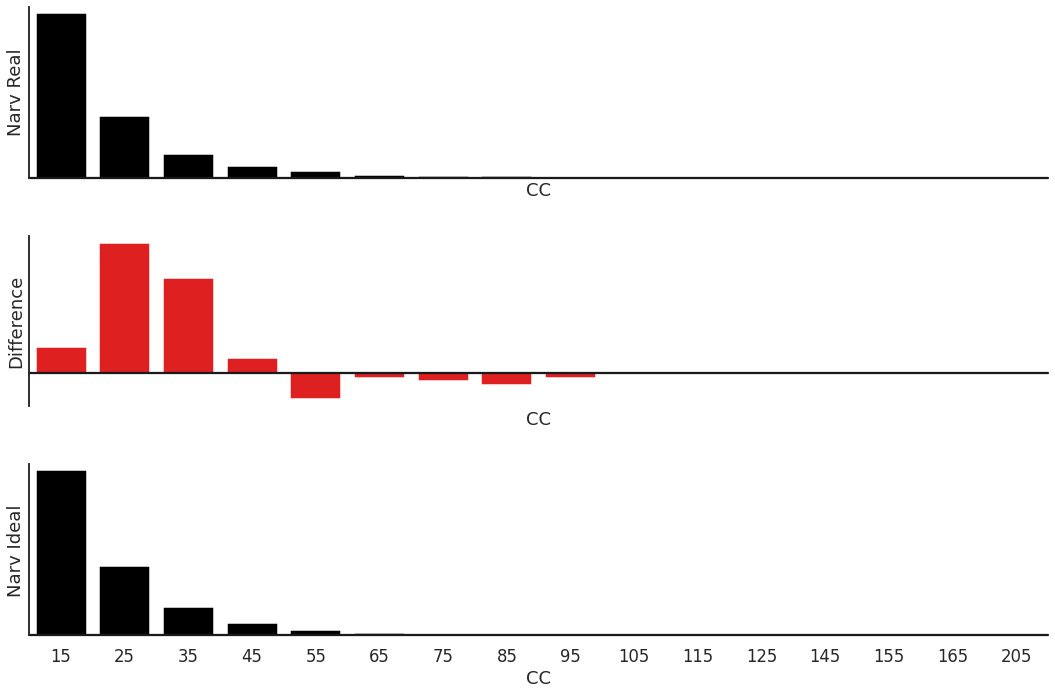

In [ ]:
sns.set(style="white", context="talk")
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

sns.barplot(x=distDiam['CC'], y=distDiam['Nha'], color='black', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set(ylim=(0, 350))
ax1.set_ylabel("Narv Real")

sns.barplot(x=distDiam['CC'], y=distDiam['Ndiff'], color="red", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Difference")

sns.barplot(x=distDiam['CC'], y=distDiam['Nbal'], color="black", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set(ylim=(0, 350))
ax3.set_ylabel("Narv Ideal")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
